In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

def standardise(x):
    return (x - np.mean(x, 0)) / np.std(x, 0)

class KMeans():
    def __init__(self, k):
        self.k = k
        
    def squared_euclidean(self, vec1, vec2):
        return np.sum(np.power(vec1 - vec2, 2))    
        
    # Calculates the k clusters for x
    def fit(self, x, n_iters):
        perm = np.random.permutation(x.shape[0])
        centroids = x[perm[:self.k]]
        for it in range(1, n_iters + 1):
            closests = [[] for i in range(self.k)]
            for sample in x:
                smallest_dist = np.inf
                smallest_idx = None
                for i, centroid in enumerate(centroids):
                    dist = self.squared_euclidean(sample, centroid)
                    if dist < smallest_dist:
                        smallest_dist = dist
                        smallest_idx = i
                closests[smallest_idx].append(sample)
            # calculate new clusters
            for i in range(len(centroids)):
                centroids[i] = np.mean(np.array(centroids[i]))
        self.centroids = centroids
    
    # Calcilates the closest cluster each sample in x belongs to
    def predict(self, x):
        predictions = []
        for sample in x:
            smallest_dist = np.inf
            smallest_idx = None
            for i, centroid in enumerate(self.centroids):
                dist = self.squared_euclidean(sample, centroid)
                if dist < smallest_dist:
                    smallest_dist = dist
                    smallest_idx = i
            predictions.append(smallest_idx)
        return np.array(predictions)
                
dataset = load_iris()
x = dataset.data
x = standardise(x)

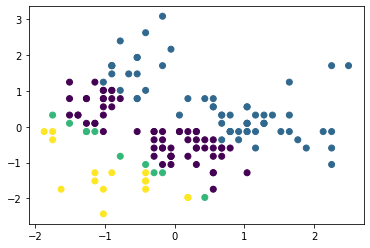

In [2]:
# Let's check how good the first two features are clustered
k_means = KMeans(4)
k_means.fit(x[:,:2], 20)
predictions = k_means.predict(x[:,:2])
plt.scatter(x[:,0], x[:,1], c=predictions)
plt.show()

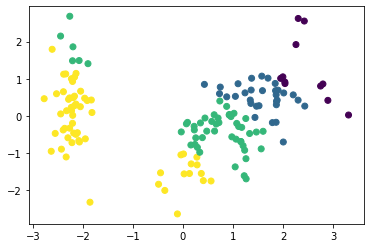

In [3]:
# Extracting two columns using PCA should yield better results, since the extracted
# features have higher variance, lets check that

pca = PCA(n_components=2)
pca.fit(x)
x = pca.transform(x)

k_means = KMeans(4)
k_means.fit(x, 20)
predictions = k_means.predict(x)

plt.scatter(x[:,0], x[:,1], c=predictions)
plt.show()